In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from PIL import Image

# There is a bash script in the assets directory that adds 
# a few helpful environment variables - including this one.
sys.path.append(os.environ['SRC_DIR'])
from data_analysis import web_utilities
from src import star_graph
%matplotlib inline 

In [2]:
if not os.path.exists('../assets/dataframe.csv'):
    df = df_utilities.build_dataframe()
    df = df_utilities.cleanup(df)
    df.to_csv('../assets/dataframe.csv')
else: 
    df = pd.read_csv('../assets/dataframe.csv', index_col = 0)
    print("Dataframe loaded from .csv!")

Dataframe loaded from .csv!


In [3]:
worlds,world_counts = np.unique(df.homeworld, return_counts=True)
populous_worlds = worlds[np.where(world_counts>2)]
populous_worlds = list(populous_worlds)[:-1] + ['All Planets']
populous_worlds

['Alderaan', 'Coruscant', 'Kamino', 'Naboo', 'Tatooine', 'All Planets']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


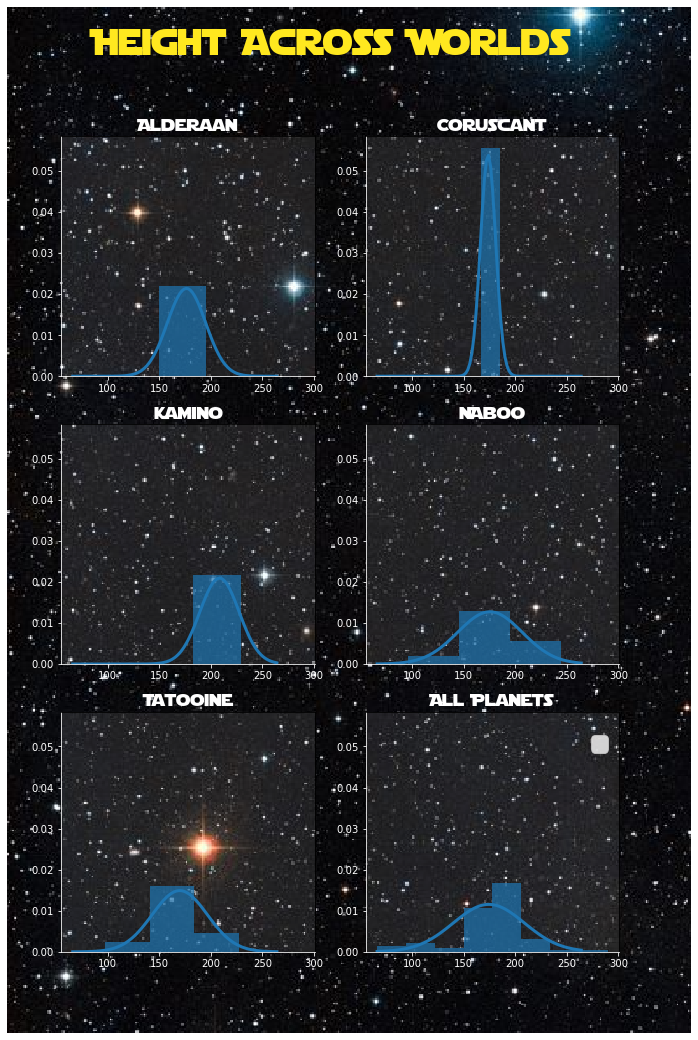

In [17]:
fig, ax = star_graph.plot_df_hist(df, 'homeworld',populous_worlds, 
                                  bin_val='scott', main_title="Height Across Worlds")
fig.savefig(os.path.join(os.environ['ASSET_DIR'],'images','height_vs_world_2.jpg'))

In [5]:
from data_analysis.jupyter_functions import get_unique_counts

species,species_count = get_unique_counts(df,'species')
common_species = species[np.where(species_count>2)][:-1]
common_species

array(['Droid', 'Gungan', 'Human'], dtype=object)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


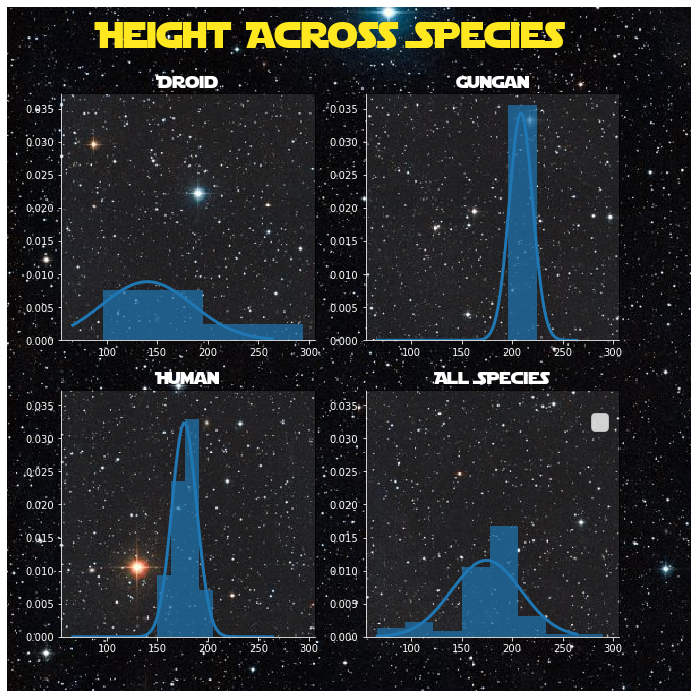

In [18]:
fig, ax = star_graph.plot_df_hist(df,'species',['Droid', 'Gungan', 'Human','All Species'],
                        bin_val='scott', plot_type='cols')
fig.savefig(os.path.join(os.environ['ASSET_DIR'],'images','height_vs_species_2.jpg'))

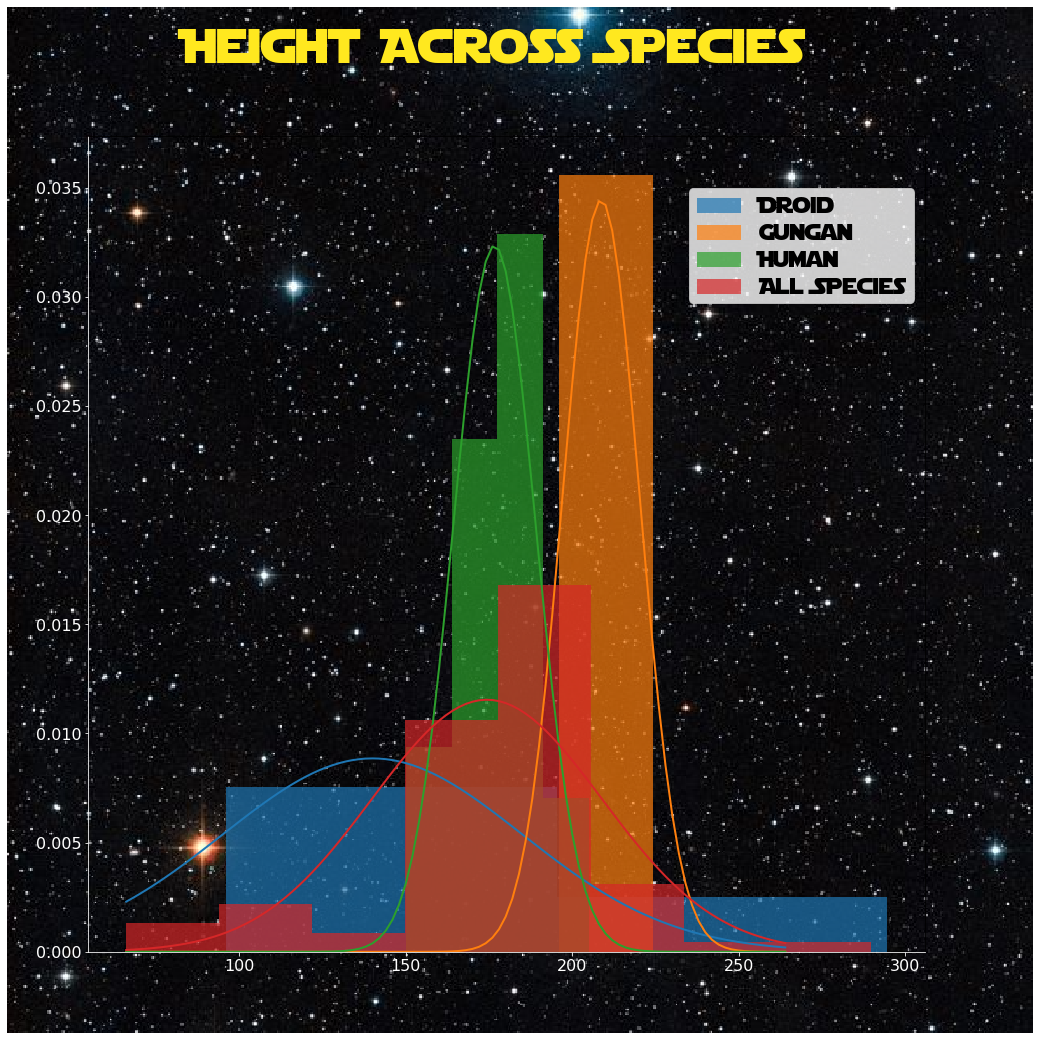

In [19]:
fig,ax = star_graph.plot_df_hist(df,'species',['Droid', 'Gungan', 'Human','All Species'], plot_type='single', 
                 bin_val='scott',graph_width=15,mt_size=48, main_title='Height Across Species')
fig.savefig(os.path.join(os.environ['ASSET_DIR'],'images','height_vs_species_3.jpg'))

In [8]:
logos = ['e4_logo','e5_logo','e6_logo','e1_logo2','e2_logo','e3_logo','fa_logo',
         'r1_logo','last_jedi_logo','solo_logo']
posters = ['e1_poster','e2_poster','e3_poster','e4_poster','e5_poster','e6_poster','fa_poster',
           'r1_poster','last_jedi_poster','solo_poster']
movie_cols = ['A New Hope','The Empire Strikes Back','Return of the Jedi', 
              'The Phantom Menace','Attack of the Clones', 'Revenge of the Sith', 
              'The Force Awakens']

In [9]:
movie_cols = movie_cols+['All Films']

In [27]:
def get_gender_count(s):
    return [np.where(s == i)[0].shape[0] for i in ['male','female','no gender']]

def ax_pixel_dims(fig, ax):
    """ Input:
            fig: matplotlib figure
            ax: axes
        Output:
            (width, height): tuple of ints. 
                The width and height of ax in pixels
    """
    width, height = fig.get_size_inches()*fig.dpi
    x0, y0, w, h = ax.get_position().bounds
    return (int(width*w), int(height*h))

def box_from_bounds(w,h,bounds,nudge_x,nudge_y):
    x0 = int(w*bounds[0]) + nudge_x
    x1 = int(w*bounds[0] + w*bounds[2]) + nudge_x
    y0 = int(h*(1-bounds[1]) - h*bounds[3]) + nudge_y
    y1 = int(h*(1-bounds[1])) + nudge_y
    return (x0, y0, x1, y1)

def get_logo(logo_name, adj_fact):
    impath = os.path.join(os.environ['ASSET_DIR'],'images',logo_name)
    logo = Image.open(impath)
    return logo.crop((0,0,int(logo.size[0]*adj_fact),logo.size[1]))    

def add_scaled_logo(fig_img, fig, ax, scale_factor, logo_name, adj_fact=.9,nudge_x=0, nudge_y=0):
    logo = get_logo(logo_name, adj_fact)
    # axes width, axes height
    aw, ah = ax_pixel_dims(fig,ax) 
    # figure width, figure height
    fw, fh = fig.get_size_inches()*fig.dpi 
    # width and height of a temporary image we'll paste our logo 
    # into. Afterwards we'll resize it to axes dimensions
    big_width = int(logo.size[0]*(1/scale_factor))
    big_height = int(big_width*(ah/aw))
    temp_img = Image.new('RGBA', (big_width, big_height), (255, 0, 0, 0))
    big_x0 = int((1 - scale_factor) * temp_img.size[0])
    # now we have a transparent image with our logo in the upper right
    temp_img.paste(logo, (big_x0,0,big_x0+logo.size[0],logo.size[1]))
    bounds = ax.get_position().bounds
    box = box_from_bounds(fw, fh, bounds, nudge_x, nudge_y)
    # resize it to the axes dimensions
    temp_img = temp_img.resize((box[2]-box[0],box[3]-box[1]))
    # paste in the figure-sized transparent image in the location occupied by ax
    fig_img.paste(temp_img, box)
    return fig_img

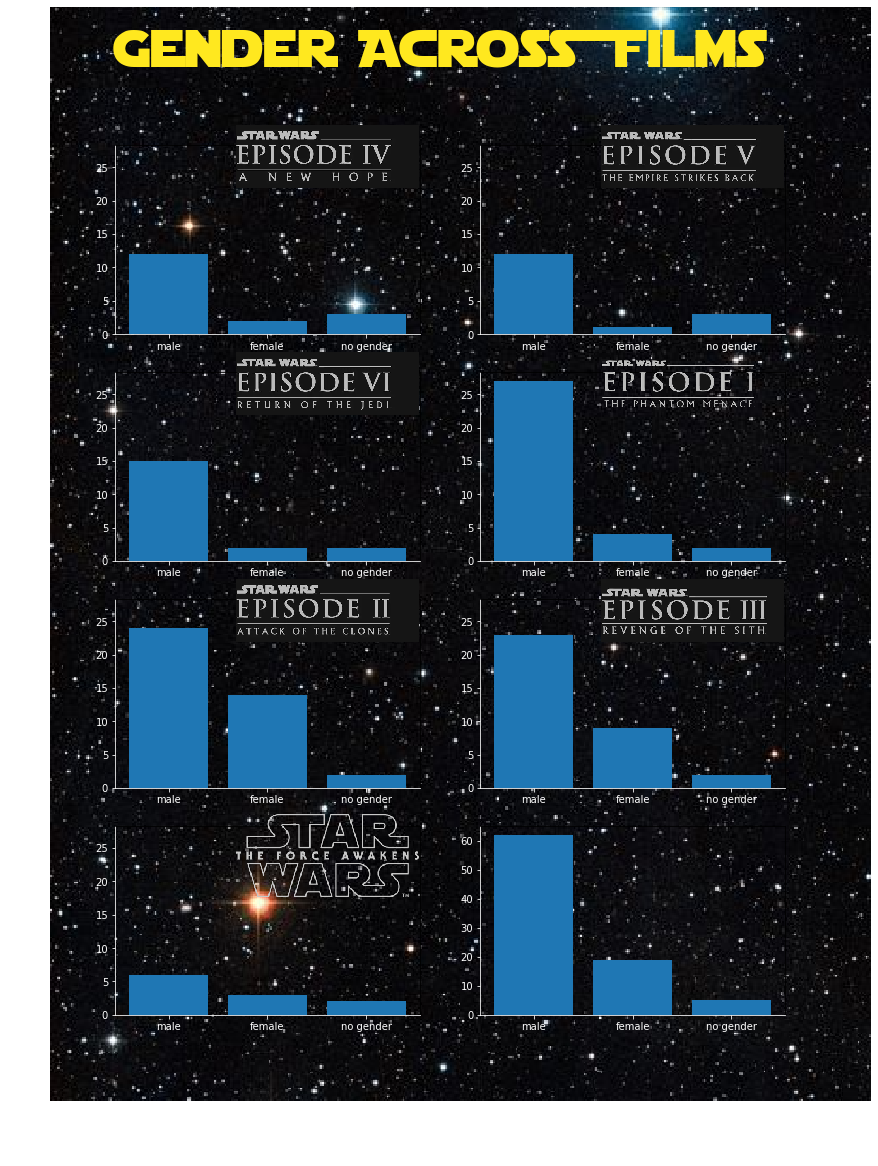

In [28]:
# I'll come back and clean this up later. 

fig = plt.figure(figsize = (12,16))
ax_list = []
img = star_graph.get_scaled_img(fig)
plt.imshow(img)
labels = ['male','female','no gender']
no_gender_count = 0
for v, i in enumerate(movie_cols):
    if i == 'All Films': movie_mask=[True for i in df.index]
    else: movie_mask = df[i]
    s = df[movie_mask]['gender']
    h = get_gender_count(s)
    if (len(ax_list) == 0) or (i == 'All Films'): 
        ax = fig.add_subplot(4,2,v+1)
    else: 
        ax = fig.add_subplot(4,2,v+1, alpha=0,sharex=ax_list[0],
                               sharey=ax_list[0])
    ax.patch.set_alpha(0)
    ax_list.append(ax)
    ax.bar(np.linspace(1,3,3), h, tick_label=labels)
    no_gender_count += h[2]
star_graph.axis_style(ax_list[-1],"Across All Films")
fig = star_graph.make_it_cool(fig, ["" for i in movie_cols],[.05,.05,.95,.95], 'Gender Across+Films', 52, alpha=0)
fw, fh = fig.get_size_inches()*fig.dpi
fw, fh = int(fw), int(fh)
fig_img = Image.new('RGBA', (fw, fh), (255, 0, 0, 0))
for i, l in zip(ax_list[:-1], logos[:-1]):
    fig_img = add_scaled_logo(fig_img, fig, i, .6, l+'.png', adj_fact=1, nudge_y=-20)
ay = fig.add_axes([0.0,0.0,1.0,1.0])
ay.imshow(fig_img,extent = (0,fw,fh,0))
plt.axis('off')
fig.savefig(os.path.join(os.environ['ASSET_DIR'],'images','gender_across_films.jpg'))
plt.show()